## **Proyecto Final**
**Conjunto de datos con ~120 000 registros de vehículos publicados en AutoScout24 (Europa). Incluye precio, marca, modelo, año, kilometraje, tipo de combustible, transmisión, potencia, características técnicas, equipamiento y datos del vendedor.
Es ideal para análisis exploratorio, modelado de precios, segmentación de mercado y proyectos de machine learning con datos reales del sector automotriz.**

## 🚗︎ **Características del conjunto de datos**
id – ID de listado único.  
description – Descripción de texto del vehículo.  

**Calificaciones:**  
- ratings_average – Calificación promedio.  
- ratings_count – Calificaciones totales.  
- ratings_recommend_percentage – Porcentaje de usuarios que recomiendan al vendedor.  

**Precios:**  
- price_currency – Moneda del precio (por defecto EUR).  
- price – Precio de lista.  
- price_tax_deductible – Marca de IVA deducible.  
- price_negotiable – Marca de negociable.
- price_net – Precio neto antes del IVA.  
- price_vat_rate – Porcentaje del tipo de IVA.  

**Vehículo:**  
- vin – Número de identificación del vehículo.  
- make – Marca del vehículo.  
- model – Nombre del modelo.  
- model_version – Modelo o versión de equipamiento.  
- german_hsn_tsn – Código HSN/TSN alemán.  
- mileage_km_raw – Valor de kilometraje bruto.  
- mileage_km – Kilometraje (km).  
- registration_date – Fecha del primer registro.  
- production_year – Año de fabricación.  
- vehicle_type – Tipo de vehículo (coche, furgoneta, camión).  
- body_type – Estilo de carrocería (sedán, SUV, etc.).  
- nr_seats – Número de asientos.  
- nr_doors – Número de puertas.  
- body_color – Color exterior.  
- paint_type – Tipo de pintura (metálica, sólida).  
- body_color_original – Color original de fábrica.  
- upholstery – Tipo de tapizado.  
- upholstery_color – Color de la tapicería.  
- power_kw – Potencia en kW.  
- power_hp – Potencia en HP.  
- transmission – Manual o automática.  
- gears – Número de marchas.  
- drive_train – Tipo de tracción (FWD, RWD, AWD).  
- cylinders – Cilindros del motor.  
- cylinders_volume_cc – Cilindrada del motor (cc).  
- weight_kg – Peso del vehículo.  

**Combustible y energía:**  
- has_particle_filter – Indicador de filtro de partículas.  
- fuel_category – Categoría de combustible (Diesel, Gasolina, Eléctrico).  
- primary_fuel – Combustible primario.  
- electric_range_km – Autonomía eléctrica (km).  
- electric_range_city_km – Autonomía eléctrica en ciudad.  
- fuel_cons_comb_l100_km – Consumo combinado de combustible (L/100 km).  
- fuel_cons_city_l100_km – Consumo urbano de combustible.  
- fuel_cons_highway_l100_km – Consumo en carretera.  
- co2_emission_grper_km – Emisiones de CO2 (g/km).  
- fuel_cons_comb_l100_wltp_km – Consumo combinado de combustible WLTP.  
- fuel_cons_electric_comb_l100_wltp_km – Consumo eléctrico WLTP.  
- co2_emission_grper_wltp_km – Emisiones de CO2 WLTP.  

**Equipamiento / Características:**  
- equipment_comfort – Lista de características de confort.  
- equipment_entertainment – ​​Lista de características de entretenimiento.  
- equipment_extra – Lista de características extra.  
- equipment_safety – Lista de características de seguridad.  

**Banderas / Booleanos:**  
- is_used – Bandera de vehículo usado.  
- is_new – Bandera de vehículo nuevo.  
- is_preregistered – Bandera de vehículo preregistrado.  
- had_accident – ​​Bandera de historial de accidentes.  
- has_full_service_history – Bandera de historial de servicio completo.  
- non_smoking – Bandera de vehículo para no fumadores.  
- nr_prev_owners – Número de propietarios anteriores.  
- is_rental – Bandera de vehículo de alquiler.  

**Varios:**  
- envir_standard – Estándar de emisión (clase Euro).  
- original_market – Mercado de venta original.  
- offer_type – Tipo de oferta (venta, arrendamiento).  

**Ubicación:**  
- country_code – Código del país.  
- zip – Código postal.  
- city – Nombre de la ciudad.  
- street – Nombre de la calle.  
- latitude – Coordenada de latitud.  
- longitude – Coordenada de longitud.  

**Vendedor:**  
- seller_is_dealer – Indicador del distribuidor.  
- seller_type – Tipo de vendedor (particular, distribuidor, empresa).  
- seller_company_name – Nombre de la empresa si es distribuidor.  
- has_warranty – Indicador de garantía.  
- warranty – Descripción de la garantía. 

### **Librerias Requeridas**

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import pickle

#  Visualización
import matplotlib.pyplot as plt              # visualización estática (rápida/precisa)
from matplotlib import offsetbox             # anotaciones/embeds extra en Matplotlib
import seaborn as sns                        # estilos + gráficos estadísticos sobre Matplotlib

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### **Pivote inicial**

In [2]:
df = pd.read_csv('/home/leonardo-soto/Descargas/autoscout24_dataset_20251108.csv')
df.shape

(118382, 75)

### Cantidad de Registros por marca

In [3]:
precio_promedio_marca = (
    df.groupby('make')['price']
      .count()
      .sort_values(ascending=False)
)

precio_promedio_marca.head(20)

make
BMW              37745
Porsche          25511
Mercedes-Benz    19400
Audi             15469
Alfa Romeo        7806
Suzuki            4592
Volvo             3643
Honda              927
Hyundai            626
Aston Martin       422
Volkswagen         352
BYD                347
Ford               302
Maserati           257
Rolls-Royce        232
smart              191
SsangYong          160
Mitsubishi          77
Maybach             66
Renault             60
Name: price, dtype: int64

### Precio promedio por marca

In [4]:
precio_promedio_marca = (
    df.groupby('make')['price']
      .mean()
      .sort_values(ascending=False)
)

precio_promedio_marca.head(20)

make
Bugatti         4,550,383.75
Rolls-Royce       280,697.58
Maybach           250,713.64
Aston Martin      248,927.62
Porsche            97,775.41
Mercedes-Benz      70,652.29
Maserati           62,450.30
Audi               58,888.35
BYD                37,502.24
BMW                34,471.26
Tesla              30,644.92
Alfa Romeo         26,728.06
Kia                20,729.20
Dongfeng           19,526.02
SsangYong          19,416.20
Hyundai            17,258.58
Volvo              17,078.36
Suzuki             16,746.16
smart              15,803.08
Mitsubishi         15,507.70
Name: price, dtype: float64

### Excluyendo Marcas que no son Porsche

In [5]:
marcas_excluir = [
    'Bugatti', 'Rolls-Royce', 'Maybach', 'Aston Martin', 'Mercedes-Benz', 'Audi',
    'Maserati', 'Ferrari', 'Lamborghini', 'Bentley', 'BYD', 'Tesla', 'Alfa Romeo',
    'BMW', 'Kia', 'Dongfeng', 'SsangYong', 'Hyundai', 'Volvo', 'Suzuki', 'smart', 
    'Mitsubishi', 'Renault', 'Volkswagen', 'Honda', 'Ford', 'Opel'
]

df = df[~df['make'].isin(marcas_excluir)]


## **Analisis Exploratorio**
### **Filtrado de variables iniciales**
#### **Identificación**
* **id**: No es relevante para el modelo el id unico de las empresas.
* **vin**: No es relevante para el modelo la identificación de los vehiculos.
#### **Descripciones Extensas**
* **description**
* **seller_company_name**
#### **Ubicacion**
Eliminando ubicaciones muy granulares, para ser mas especifico en si afecta la ubicación.
* **street**
* **latitude**
* **longitude**
* **zip**
* **city**
#### **Precios Alternos**
Eliminando variables de precio alternos de IVA entre otros, para definir una sola como target.
* **price_currency**
* **price_tax_deductible**
* **price_negotiable**
* **price_net**
* **price_vat_rate**
#### **Medidas de combustion**
Se generalizan las medidas de combustion y granularidad del mismo.
* **has_particle_filter**
* **primary_fuel**
* **electric_range_city_km**
* **fuel_cons_comb_l100_km**
* **fuel_cons_city_l100_km**
* **fuel_cons_highway_l100_km**
* **fuel_cons_electric_comb_l100_wltp_km**
* **co2_emission_grper_km**


In [6]:
# Lista de variables a eliminar
cols_to_drop = [
    # Identificadores y texto libre
    'id','vin','description','seller_company_name','street','zip','warranty', 'city',

    # Coordenadas
    'latitude','longitude',

    # Variables que generan leakage del precio
    'price_currency', 'price_net', 'price_vat_rate','price_tax_deductible', 'price_negotiable', 'model_version'

    # Variables redundantes de combustion
    'has_particle_filter', 'primary_fuel', 'electric_range_city_km', 'fuel_cons_comb_l100_km', 'fuel_cons_city_l100_km',
    'fuel_cons_highway_l100_km', 'fuel_cons_electric_comb_l100_wltp_km', 'co2_emission_grper_km', 'mileage_km_raw']

# Eliminarlas del DataFrame
df = df.drop(columns=cols_to_drop, errors='ignore')

### **Revisando valores unicos**

In [7]:
# Columnas del Dataframe
columnas = df.columns

# Revisando valores unicos de las variables
for col in columnas:
    conteo = len(df[col].unique())
    if conteo < 1000:
        print(f'Columnas {col} tiene {conteo} valores unicos')
        print(df[col].unique())
    else:
        print(f'Col {col} tiene {conteo} valores unicos ------------------ Excede --------------')

Columnas ratings_average tiene 43 valores unicos
['4,8' nan '4,3' '4,7' '5,0' '4,4' '3,4' '4,5' '0,0' '4,2' '4,6' '1,8'
 '3,9' '4,1' '4,9' '2,3' '3,2' '2,2' '3,6' '4,0' '3,8' '3,1' '1,3' '1,4'
 '2,8' '3,5' '3,0' '3,7' '3,3' '2,4' '1,9' '2,6' '1,0' '2,9' '2,5' '2,0'
 '1,7' '1,2' '2,7' '1,6' '1,5' '2,1' '1,1']
Columnas ratings_count tiene 481 valores unicos
[1.240e+02       nan 3.400e+01 1.000e+01 1.000e+00 6.900e+01 9.600e+01
 7.800e+01 8.000e+00 5.830e+02 1.200e+01 3.710e+02 1.200e+02 3.600e+01
 0.000e+00 1.600e+01 3.000e+00 5.000e+00 6.700e+01 5.500e+01 2.500e+01
 1.700e+01 2.100e+02 1.110e+02 4.000e+00 2.410e+02 5.100e+01 5.040e+02
 4.300e+01 4.000e+01 2.690e+02 7.000e+00 3.200e+01 1.260e+02 6.000e+00
 1.050e+02 4.200e+01 2.900e+01 3.800e+01 1.300e+01 2.460e+02 2.700e+02
 1.930e+02 2.000e+00 3.000e+01 2.100e+01 1.230e+02 4.500e+01 6.780e+02
 1.710e+02 3.300e+01 2.600e+01 1.900e+01 5.300e+01 4.590e+02 2.000e+01
 8.700e+01 1.350e+02 4.100e+01 8.480e+02 1.100e+01 8.400e+01 1.130e+02
 1.

### **Revision de Nulos**

* **Se eliminaran las variables que tengan una cantidad de nulos muy grande, debido a que imputarlos podria ser cambiar la distribucion completamente**

In [8]:
# Quedandonos con las columnas que tienen nulos
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]

# Haciendo un dataframe con la variable, cantidad de nulos y % de nulos.
resumen = pd.DataFrame({
    'Column': nulos.index,
    'Null Count': nulos.values,
    'Null %': ((nulos.values / len(df)) * 100).round(2)
})

resumen.sort_values(by ='Null %', ascending = False, inplace=True)
resumen = resumen.reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(resumen)

                          Column  Null Count  Null %
0                   has_warranty       25511  100.00
1                production_year       23377   91.63
2              electric_range_km       22827   89.48
3                 german_hsn_tsn       21423   83.98
4    fuel_cons_comb_l100_wltp_km       20931   82.05
5     co2_emission_grper_wltp_km       18016   70.62
6                original_market       16044   62.89
7                 nr_prev_owners       11960   46.88
8            body_color_original       11346   44.47
9                 envir_standard       11167   43.77
10               ratings_average       10163   39.84
11  ratings_recommend_percentage       10163   39.84
12                 ratings_count       10163   39.84
13                         gears        8601   33.71
14              upholstery_color        7205   28.24
15                    paint_type        7147   28.02
16                    upholstery        6227   24.41
17                   drive_train        5847  

In [9]:
# Columnas con muchos nulos
lot_nulls = [
    'has_warranty', 'production_year','fuel_cons_comb_l100_wltp_km',
    'german_hsn_tsn', 'original_market', 'co2_emission_grper_wltp_km', 'nr_prev_owners',
    'body_color_original', 'gears', 'ratings_count', 'ratings_average', 'ratings_recommend_percentage',
    'envir_standard', 'upholstery_color', 'power_kw', 'is_new', 'is_preregistered', 'make', 'paint_type_Others'
]

# Eliminarlas del DataFrame
df = df.drop(columns=lot_nulls, errors='ignore')

# Lista de variables a imputar
vars_imputar = ['seller_type', 'country_code', 'fuel_category', 'registration_date', 'mileage_km',
               'transmission', 'model_version', 'model', 'power_hp', 'nr_seats', 'body_color', 'cylinders_volume_cc',
               'weight_kg', 'cylinders', 'paint_type', 'upholstery', 'drive_train', 'nr_doors']

### Imputacion de variables
* **Numericas: Promedio**
* **Categoricas: Moda**

In [10]:
def imputacion(df, nulos):
    # Separación por tipos de datos (solo columnas en nulos)
    num_cols = df[nulos].select_dtypes(include='number').columns
    cat_cols = df[nulos].select_dtypes(include=['object', 'string']).columns
    bool_cols = df[nulos].select_dtypes(include=['bool']).columns

    # Imputadores
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Imputación
    if len(num_cols) > 0:
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    if len(cat_cols) > 0:
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    if len(bool_cols) > 0:
        df[bool_cols] = cat_imputer.fit_transform(df[bool_cols])

    return df
        
        
df = imputacion(df, vars_imputar)

# Redefiniendo variable
df['electric_range_km'] = df['electric_range_km'].fillna(0)

### **Estandarizacion y feature eng**

In [11]:
# Edad del vehiculo
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
current_year = pd.Timestamp.now().year
df['vehicle_age'] = current_year - df['registration_date'].dt.year

df = df.drop(columns=['registration_date'])

df['mileage_km'] = (
    df['mileage_km']
    .str.replace(' km', '', regex=False)   # quitar ' km'
    .str.replace(',', '', regex=False)     # quitar comas
    .astype(float)
)

df['weight_kg'] = (
    df['weight_kg']
    .str.replace(' kg', '', regex=False)   # quitar ' km'
    .str.replace(',', '', regex=False)     # quitar comas
    .astype(float)
)


In [12]:
# COnteo de equipamientos
equip_cols = [
    'equipment_comfort',
    'equipment_entertainment',
    'equipment_extra',
    'equipment_safety'
]

for col in equip_cols:
    df[col + '_count'] = df[col].apply(
        lambda x: len(x.split(',')) if isinstance(x, str) else 0
    )

df = df.drop(columns=equip_cols)

In [13]:
cols_to_drop = [
    'model_version',   # demasiadas categorías
    'body_color',
    'upholstery', 

]

df = df.drop(columns=cols_to_drop)

### Analisis Univariado

In [14]:
def grafico_bivariado(df, var_x, var_y):
    plt.figure()
    plt.scatter(df[var_x], df[var_y])
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f"{var_y} vs {var_x}")
    plt.show()

In [15]:
def histograma_variable(df, variable):
    plt.figure()
    df[variable].dropna().hist(bins=30)
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {variable}")
    plt.show()

In [16]:
def vista_numericas(lista, df, xlim=None):
    for col in lista:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 columnas

        # Boxplot
        sns.boxplot(y=col, data=df, ax=axes[0])
        axes[0].set_title(f'{col} (Boxplot)')

        # Violin plot
        sns.violinplot(y=df[col], ax=axes[1])
        axes[1].set_title(f'{col} (Violin Plot)')

        # Histograma con KDE
        sns.histplot(df[col], kde=True, ax=axes[2])
        if xlim:
            axes[2].set_xlim(xlim)
        axes[2].set_title(f'{col} (Histograma + KDE)')
        axes[2].set_xlabel(col)
        axes[2].set_ylabel('Densidad')

        plt.tight_layout()
        plt.show()

In [17]:
# Funcion para visualisar las variables categoricas
def vista_categoricas(lista, df):
    for col in lista:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col)
        plt.xticks(rotation=90)

        total = len(df)
        # Para cada barra, mostrar el porcentaje correspondiente
        for p in ax.patches:
            count = p.get_height()
            porcentaje = count / total * 100
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.text(x, y + 0.5, f'{porcentaje:.1f}%', ha='center')

        plt.tight_layout()
        plt.show()

In [18]:
# Columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Columnas categóricas (todo lo que NO es numérico)
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns.tolist()

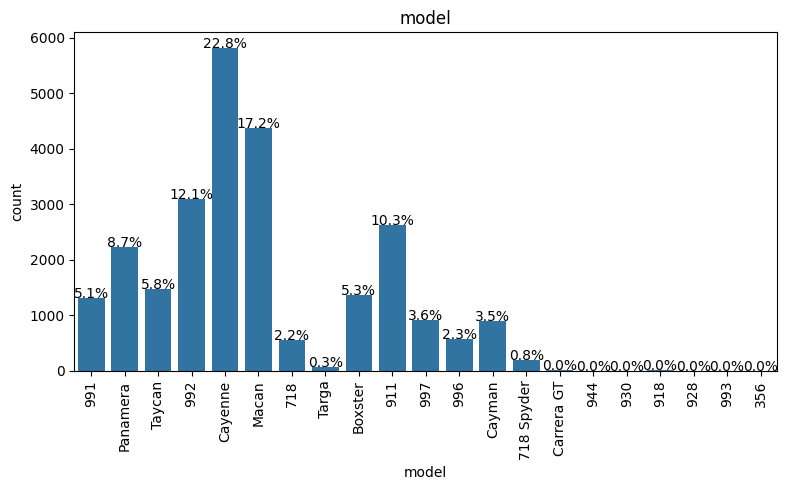

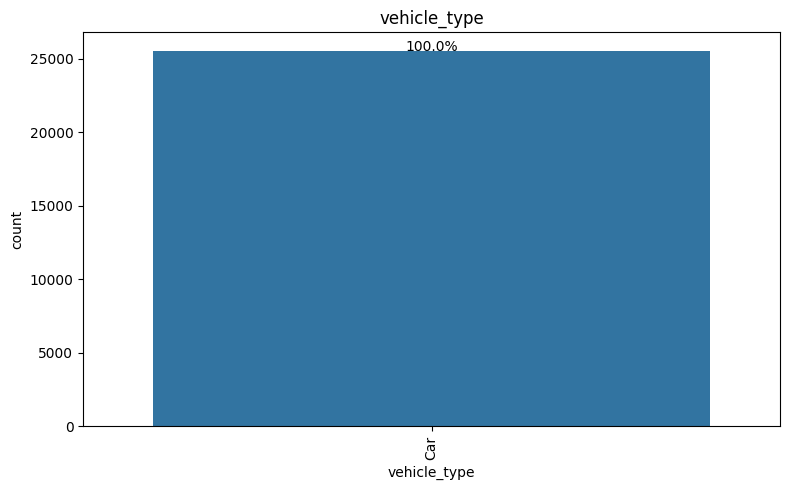

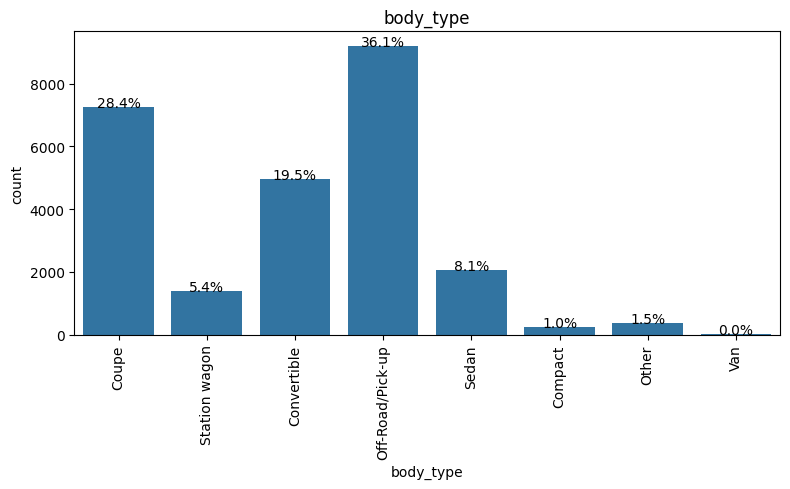

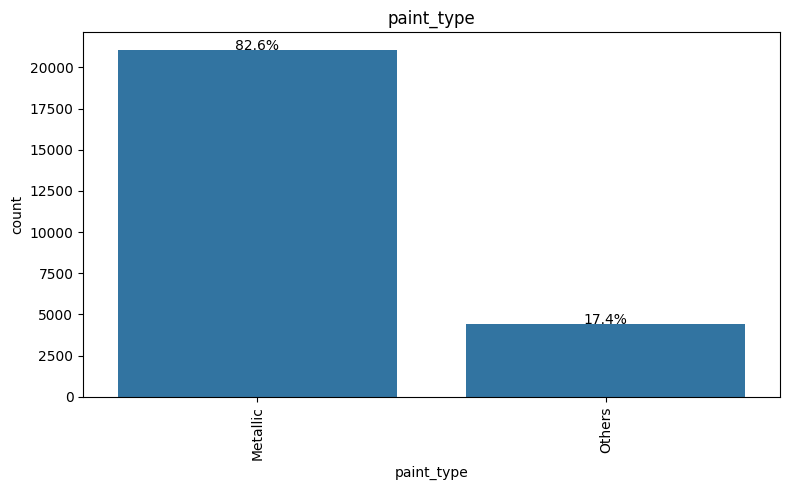

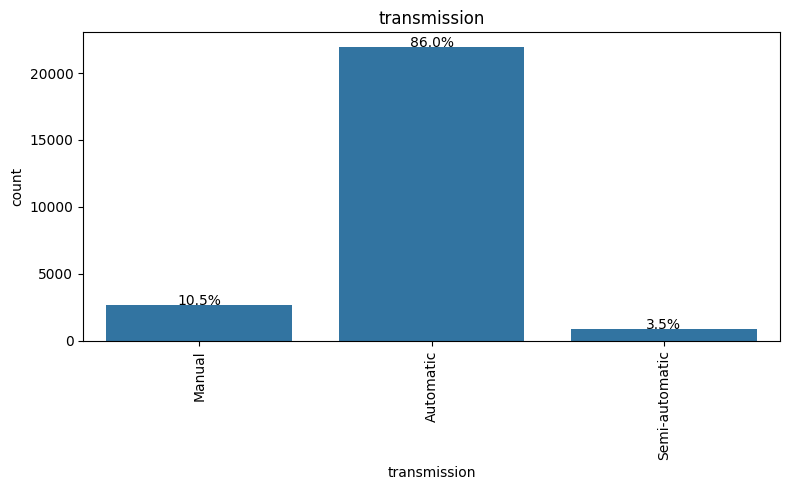

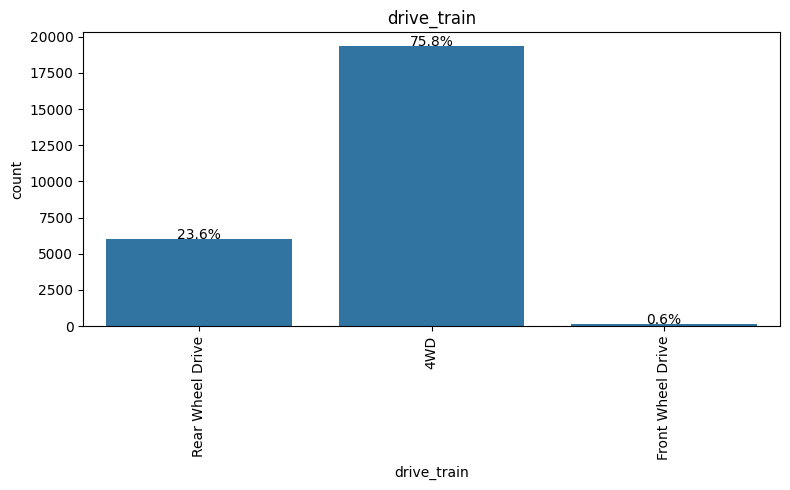

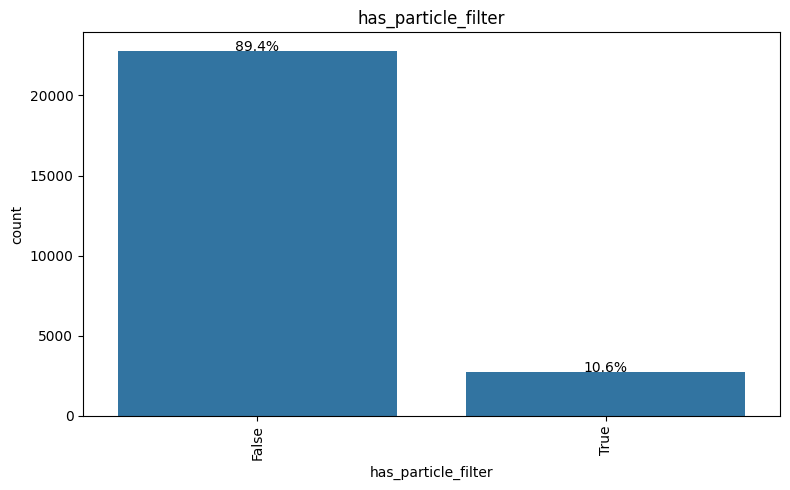

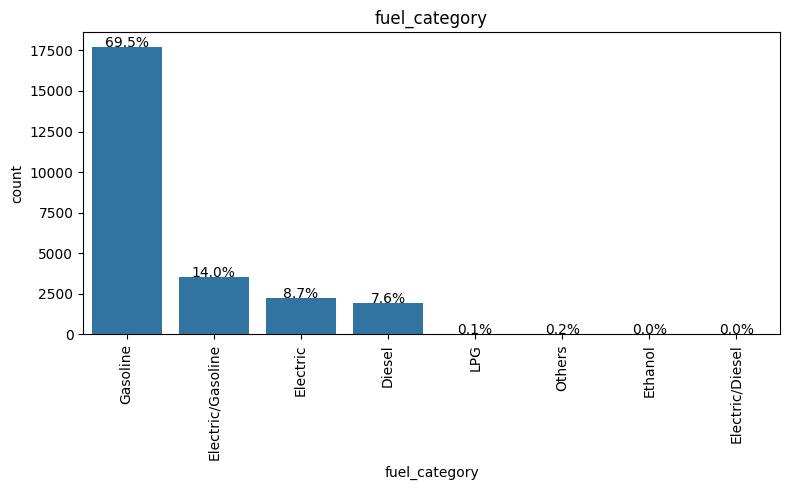

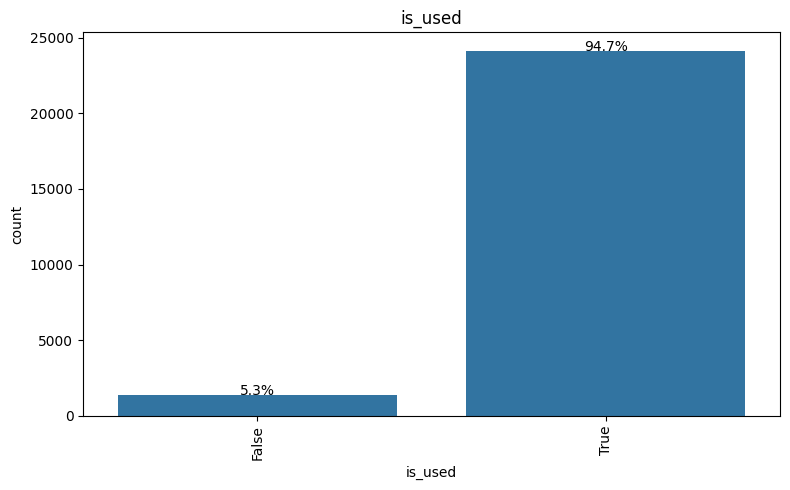

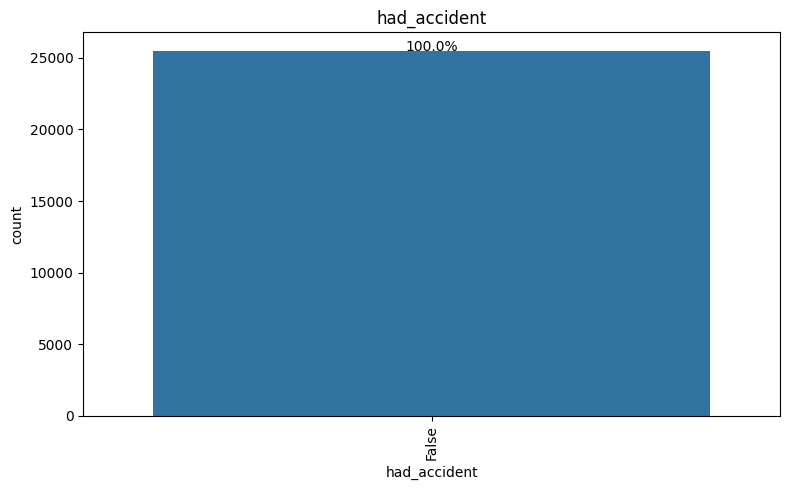

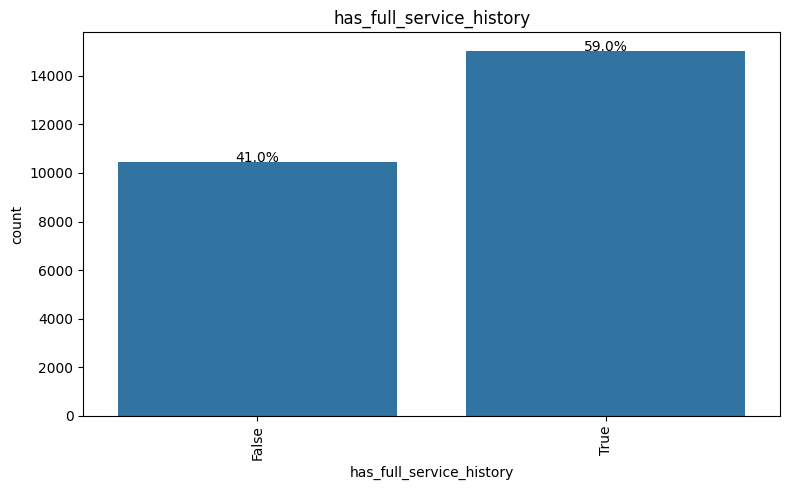

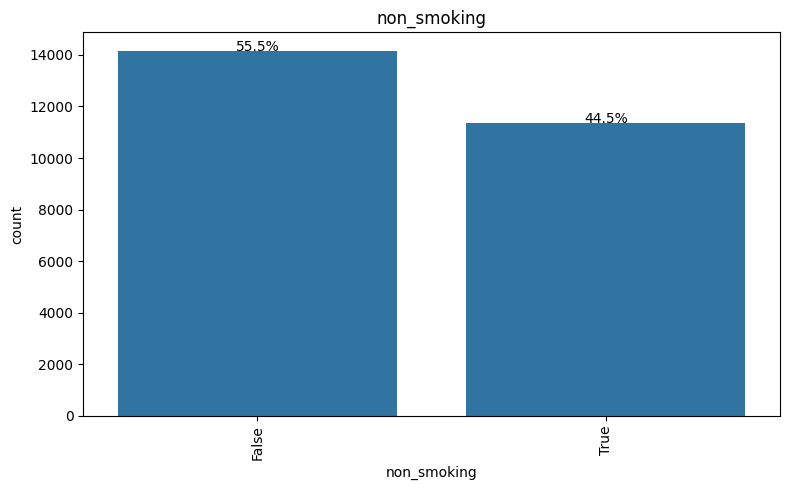

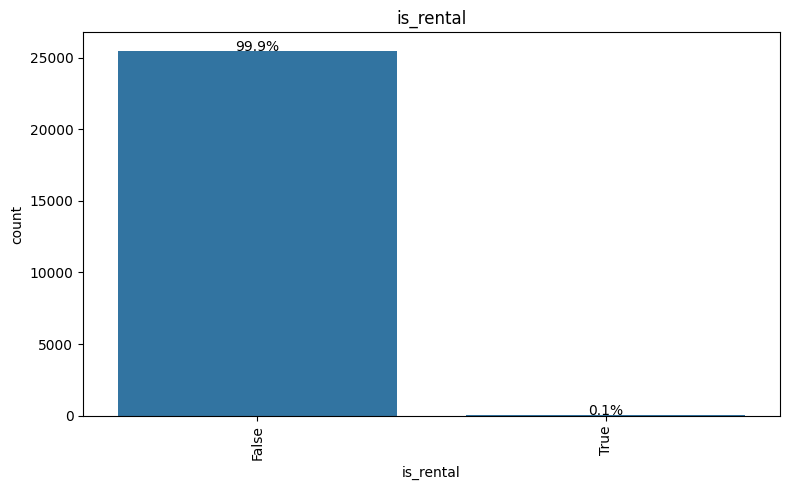

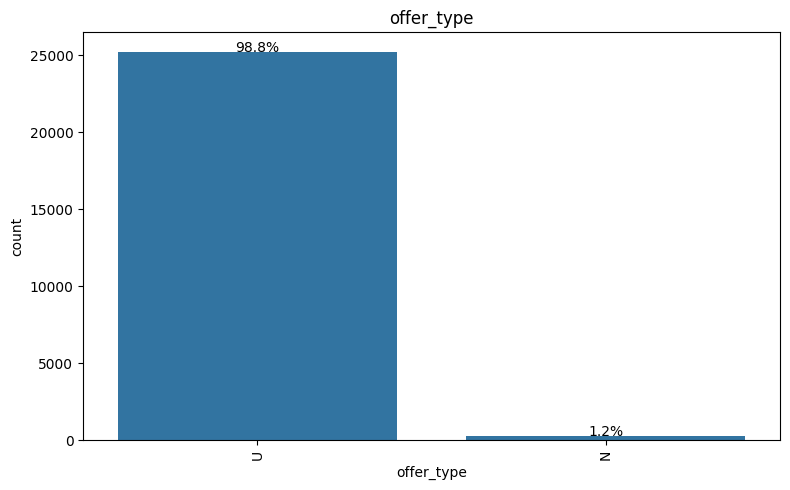

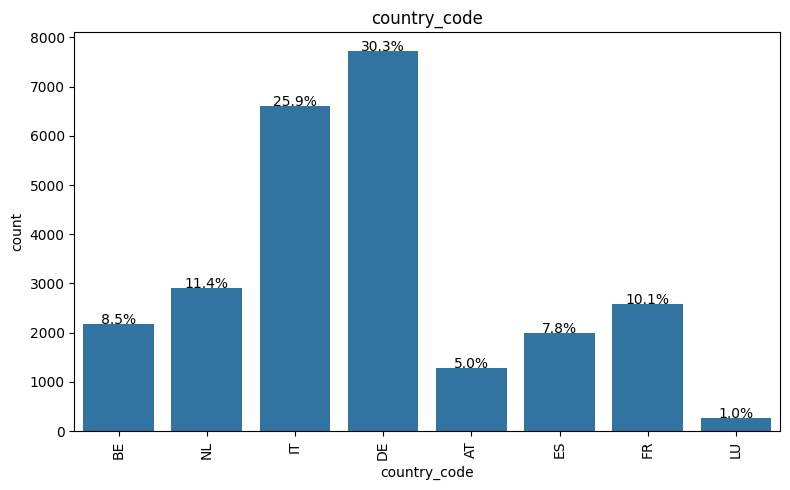

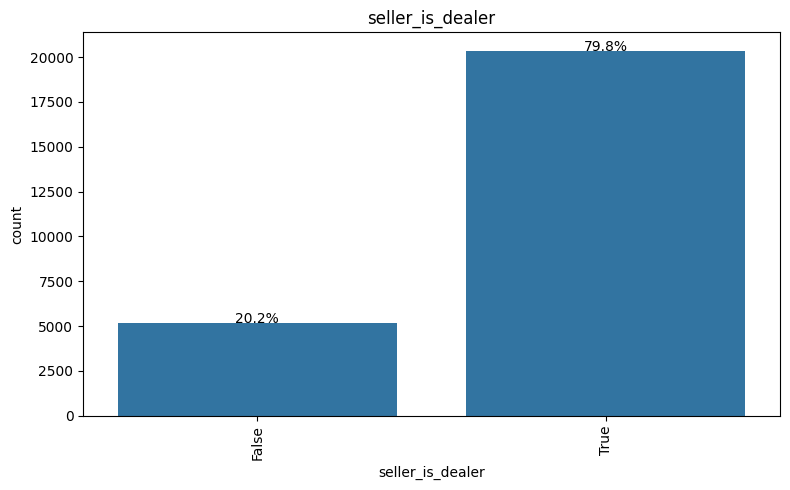

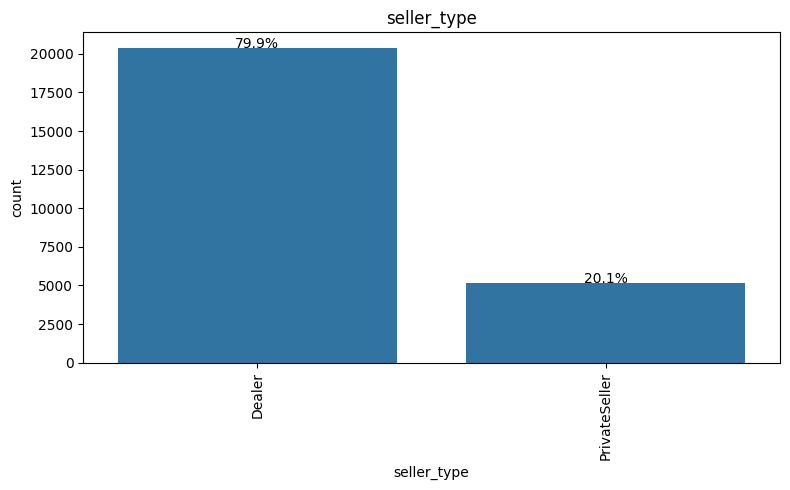

In [19]:
# Usando funcion para visualizar variables categoricas
vista_categoricas(columnas_categoricas, df)

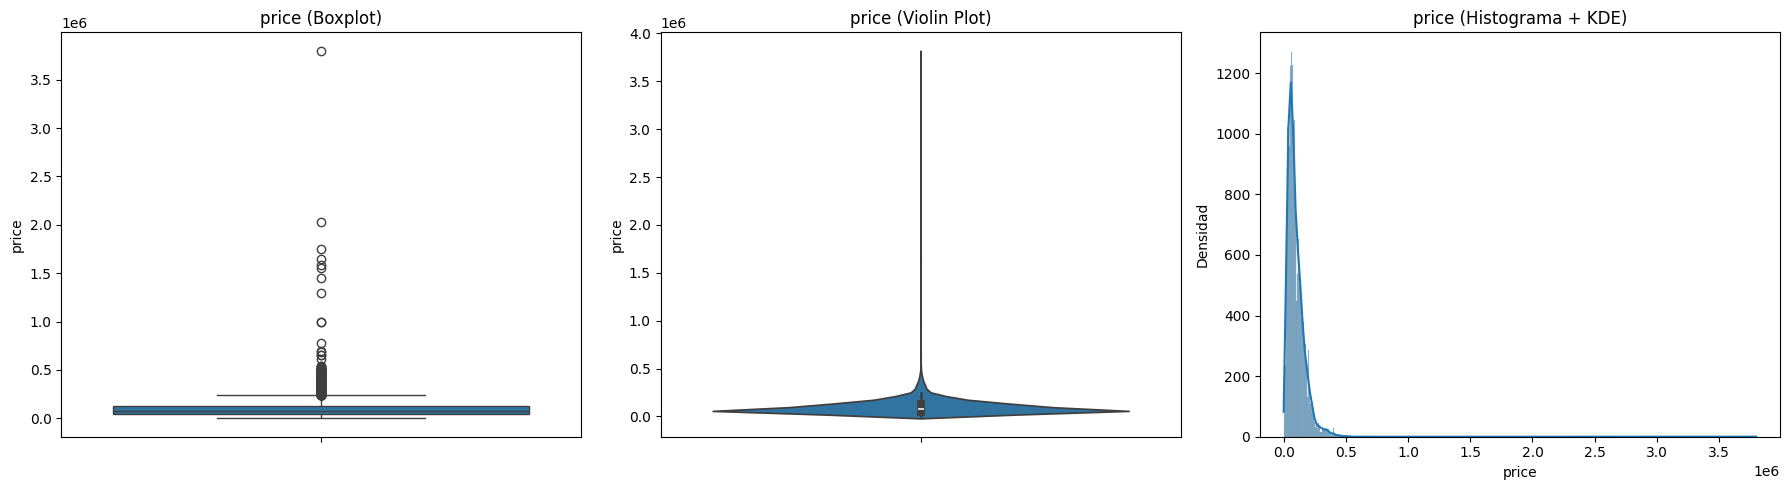

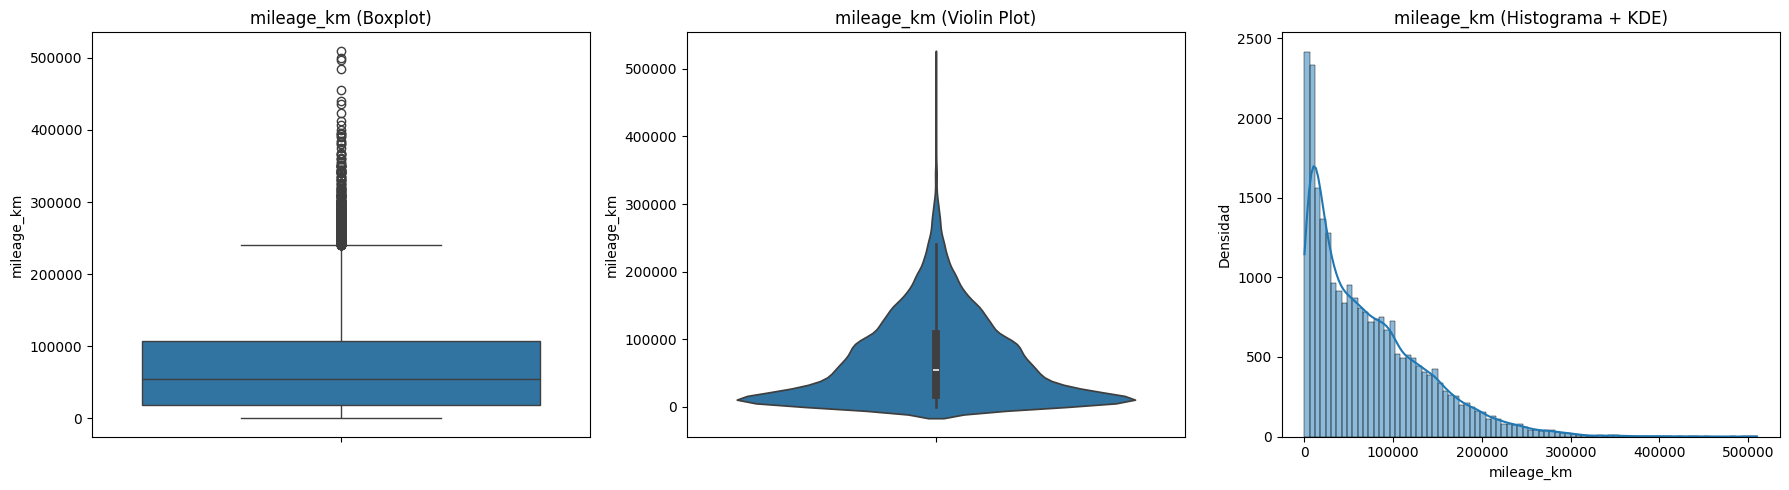

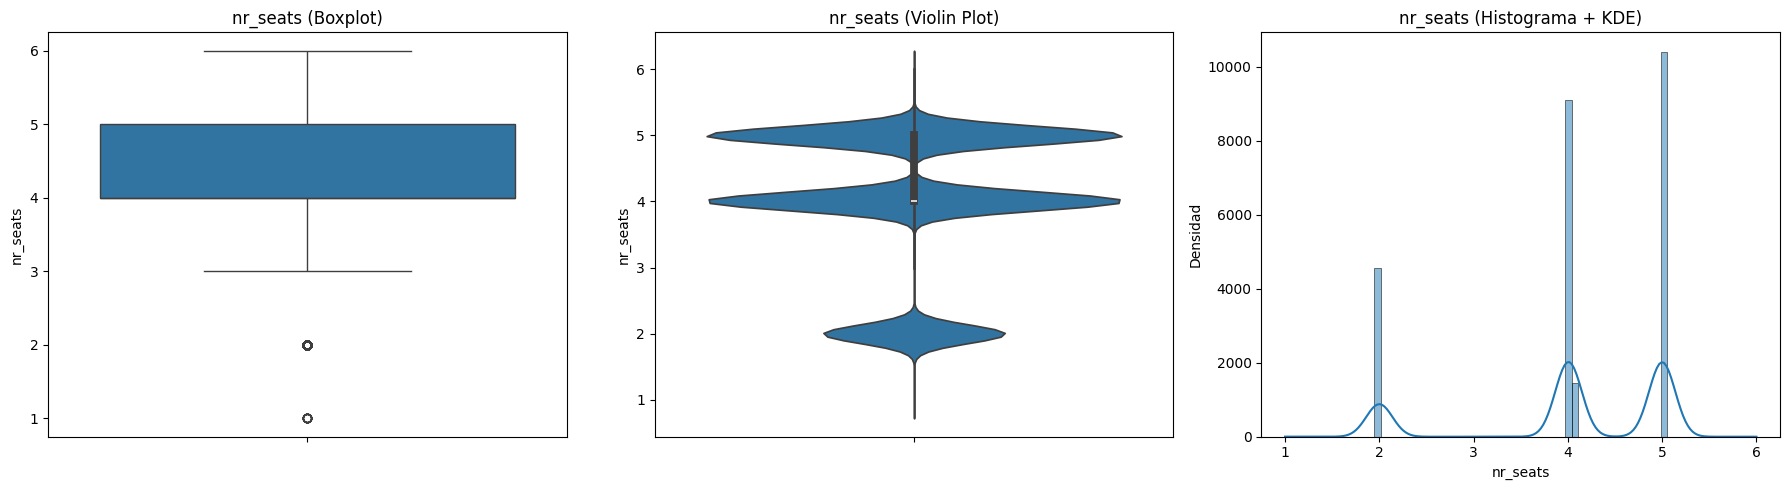

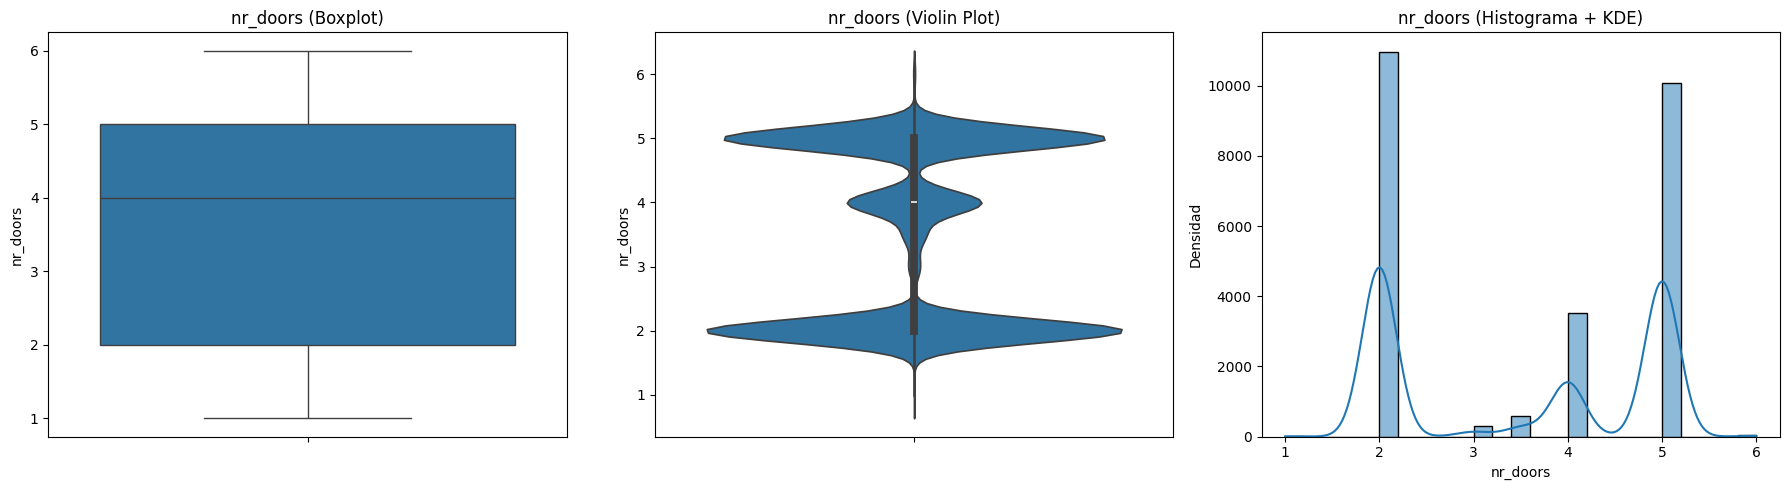

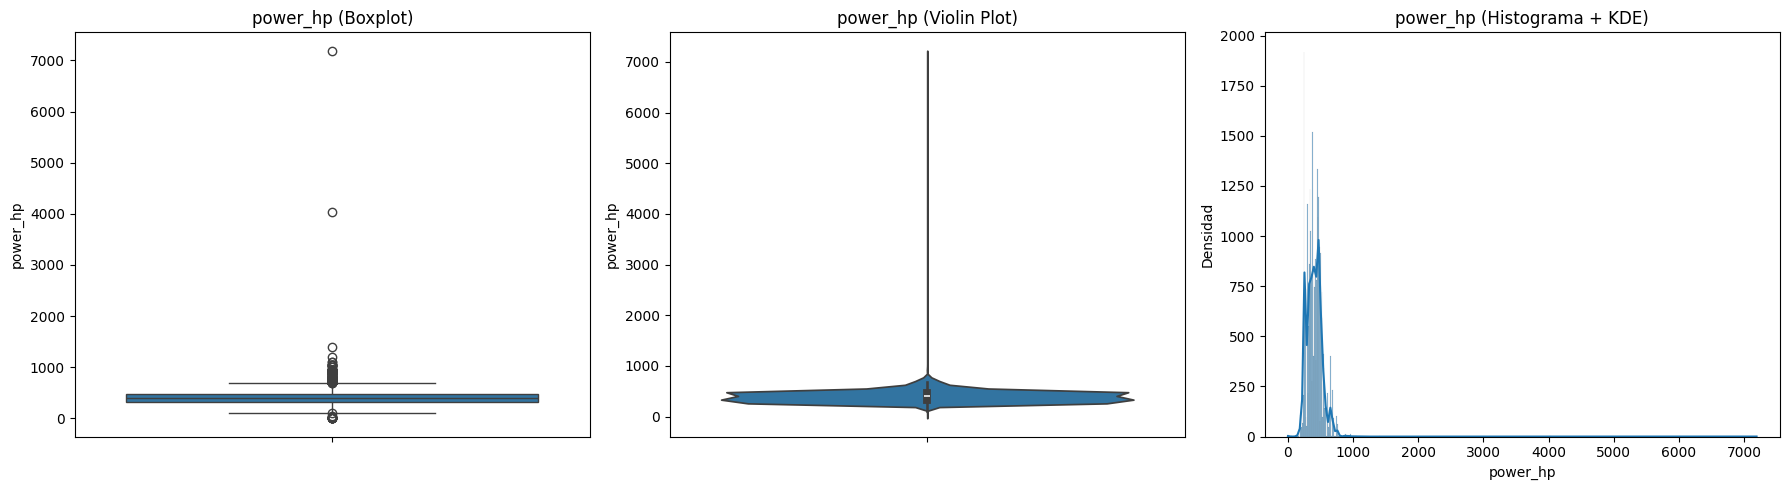

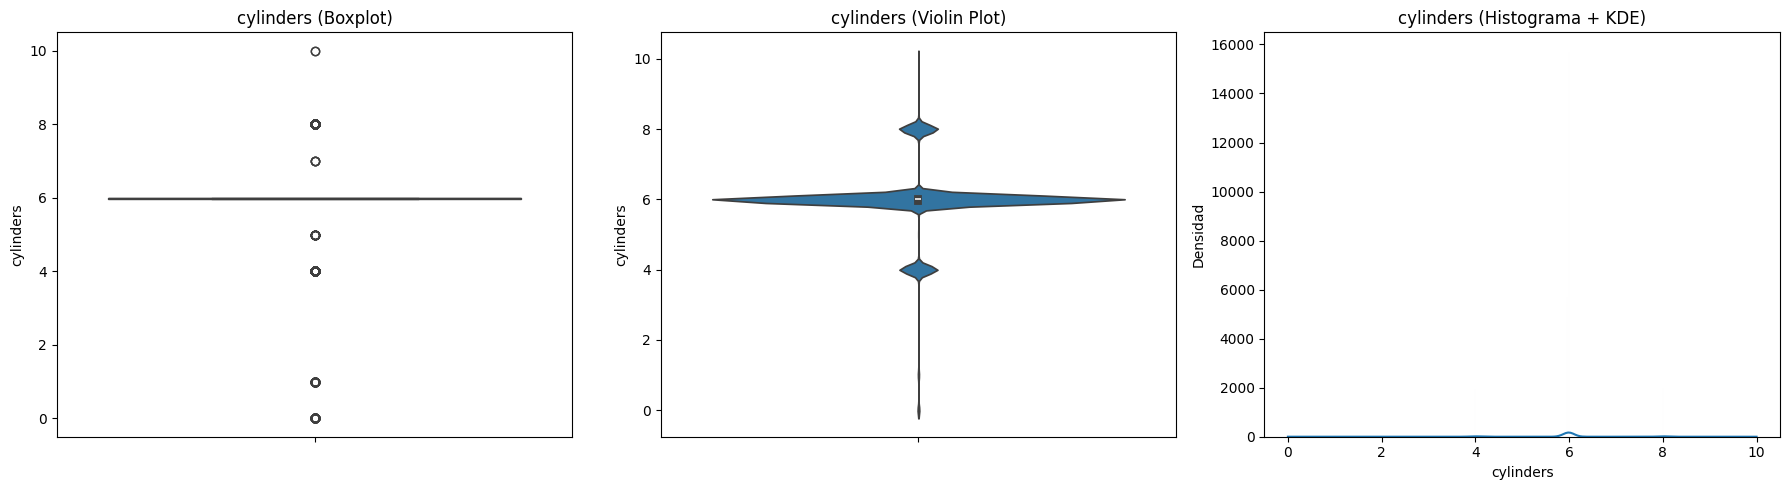

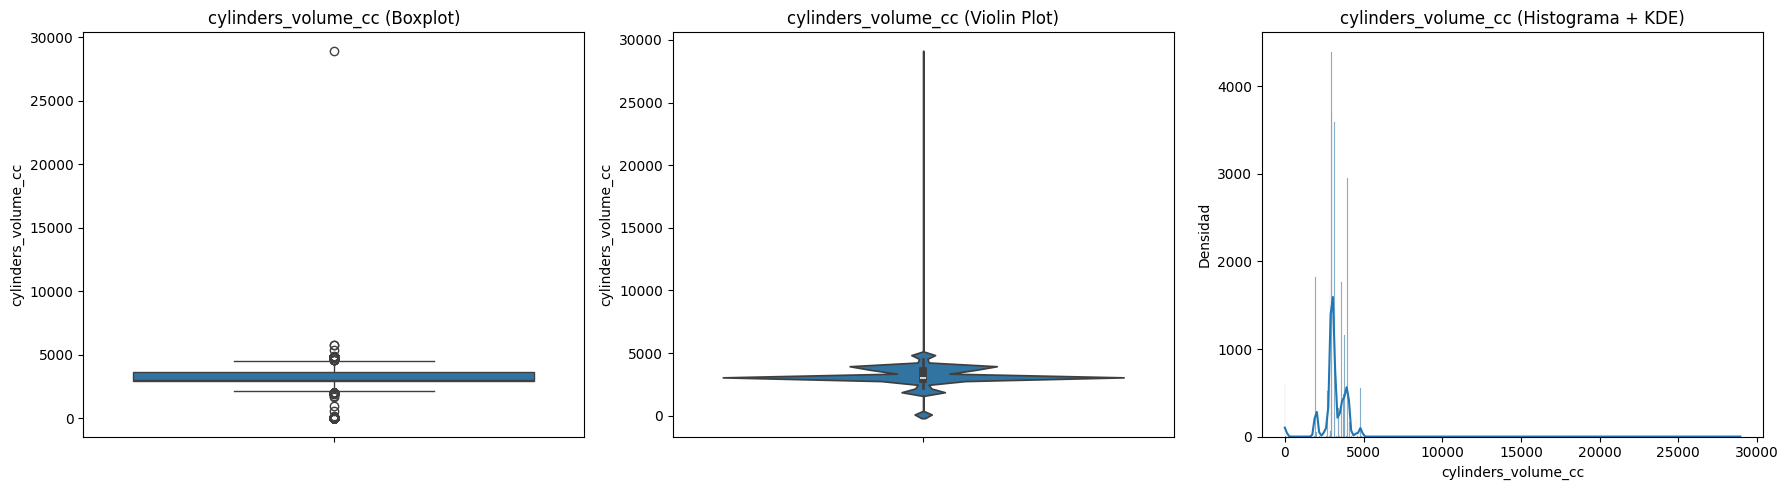

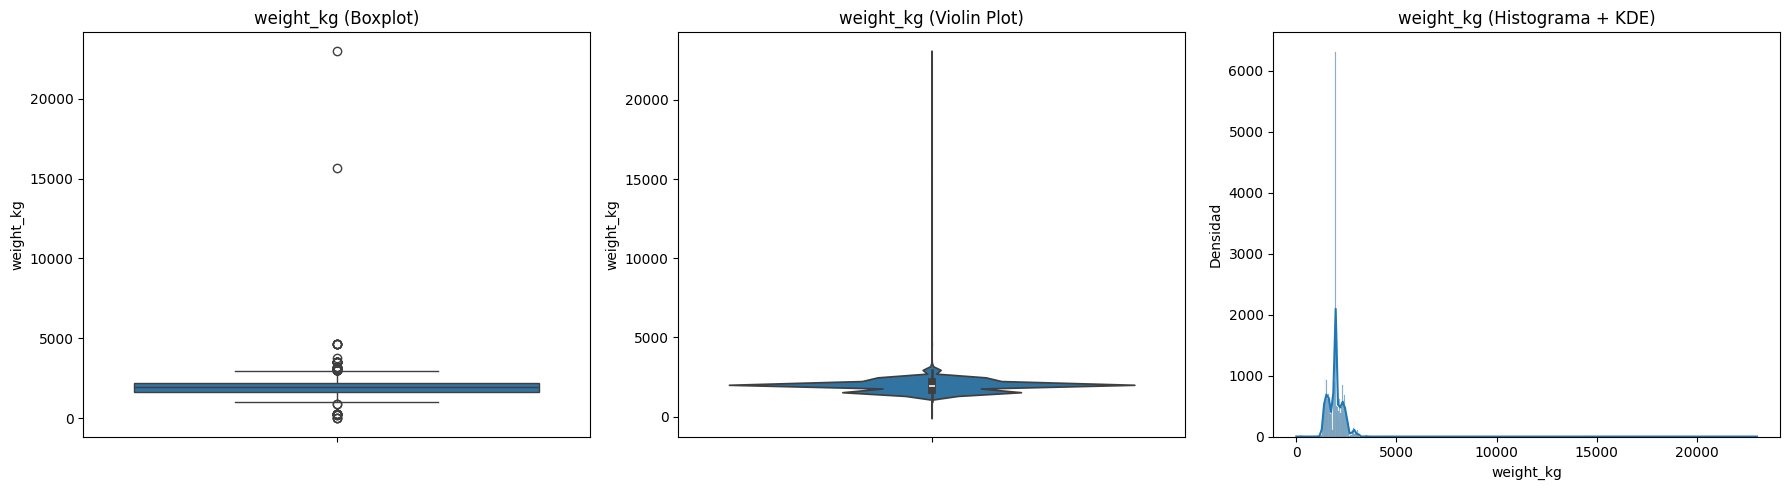

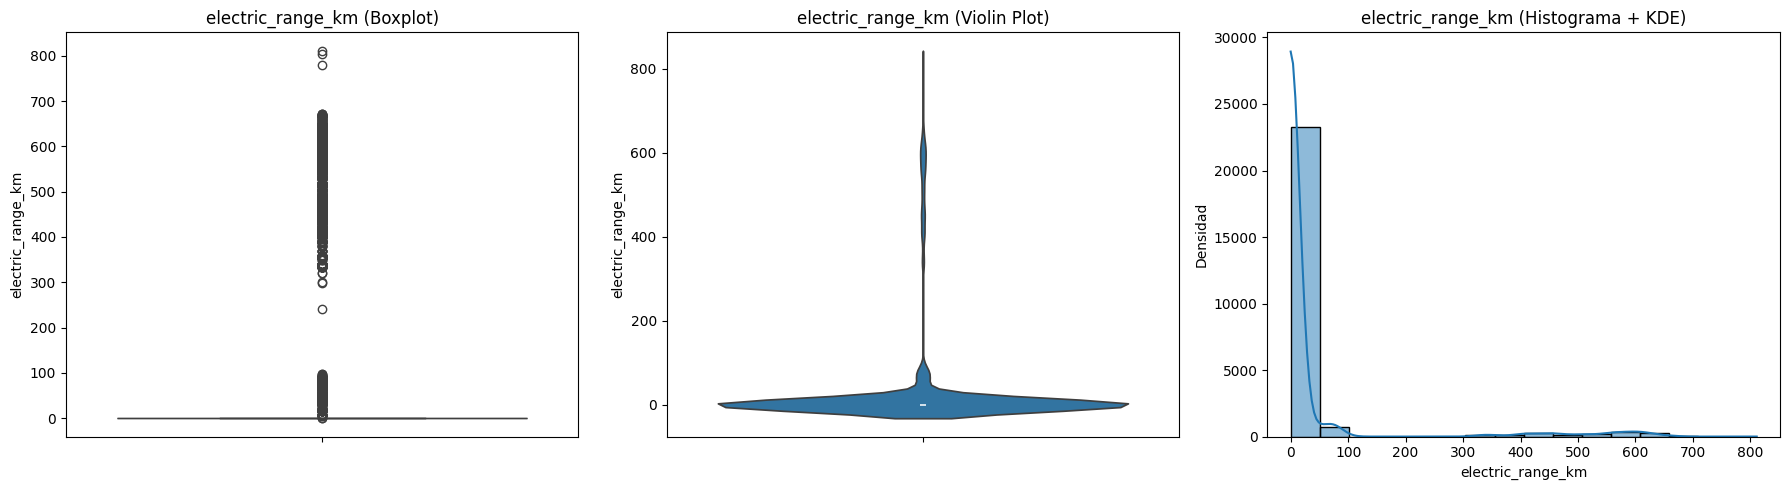

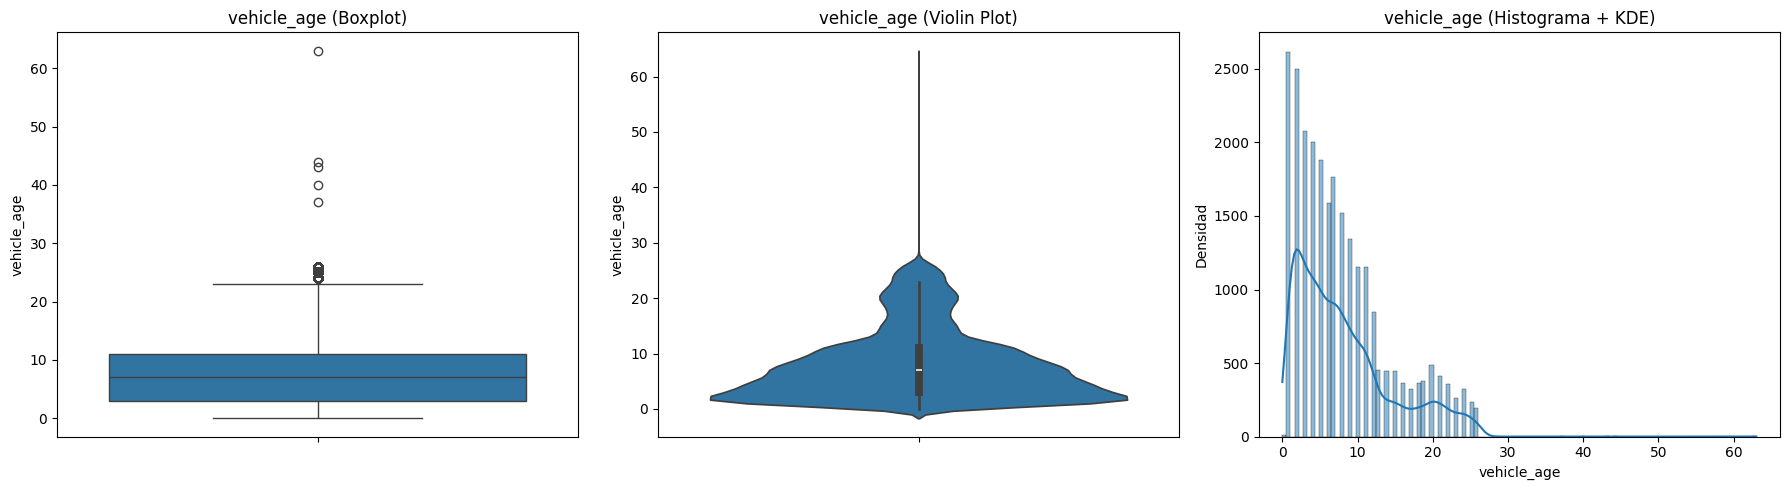

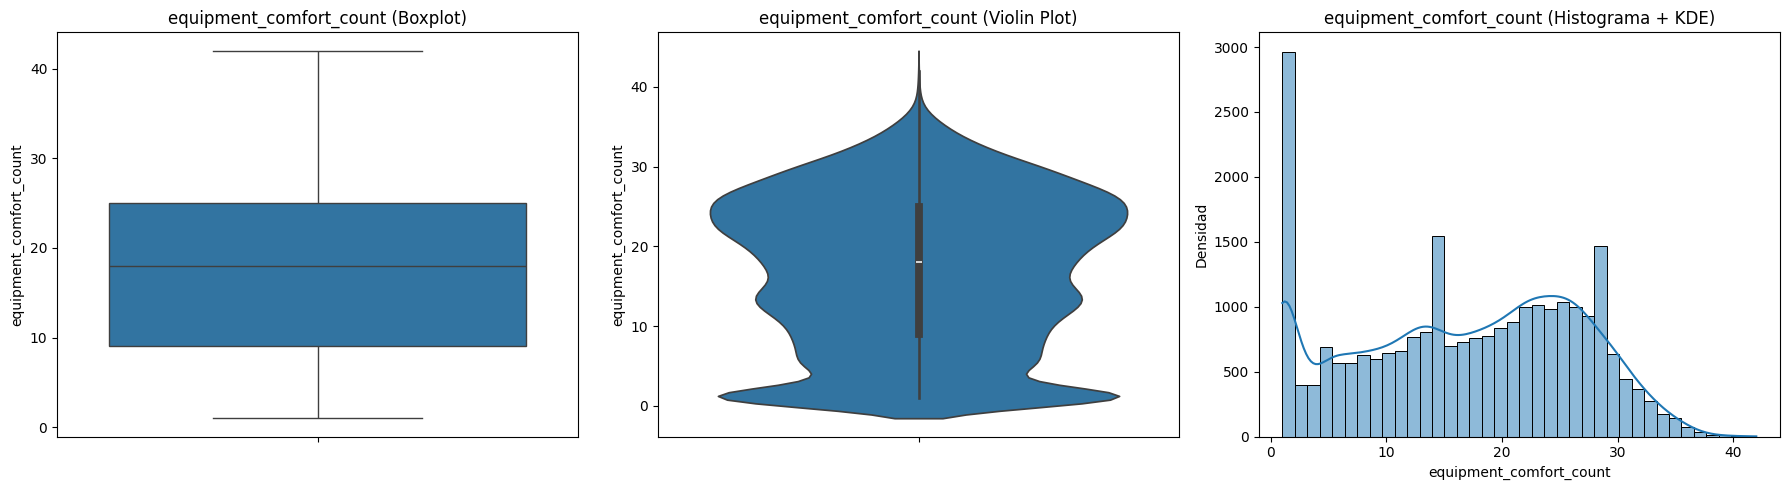

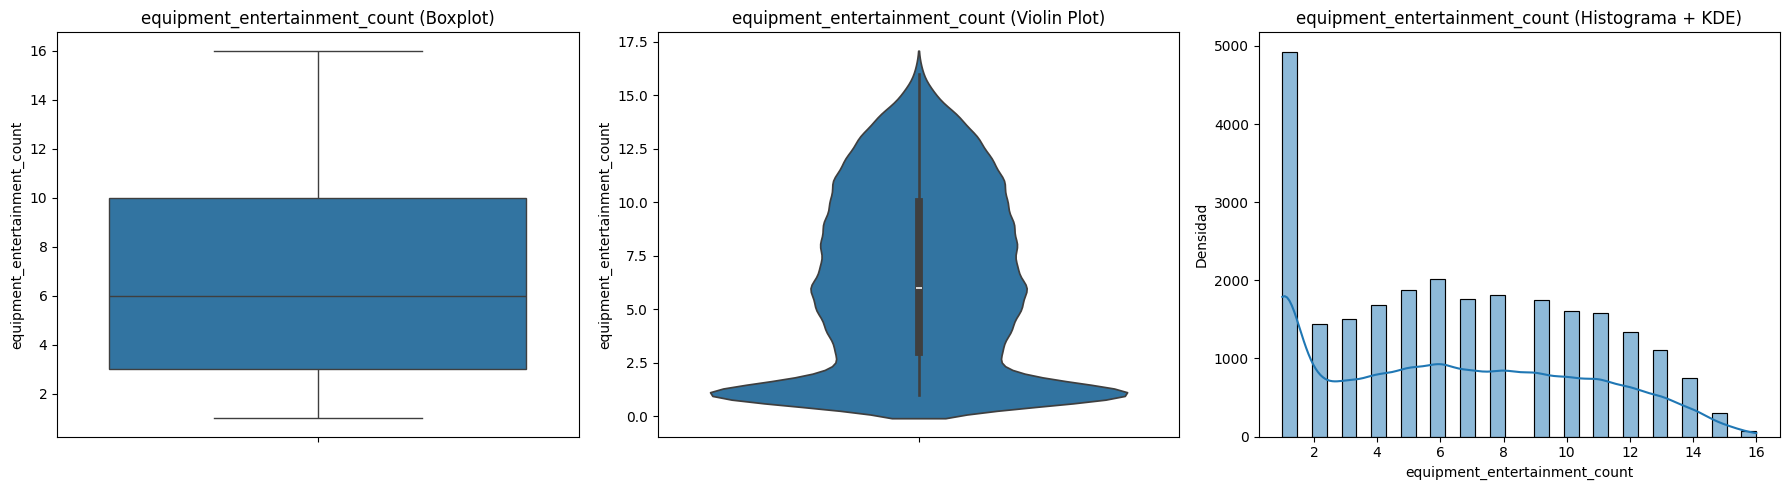

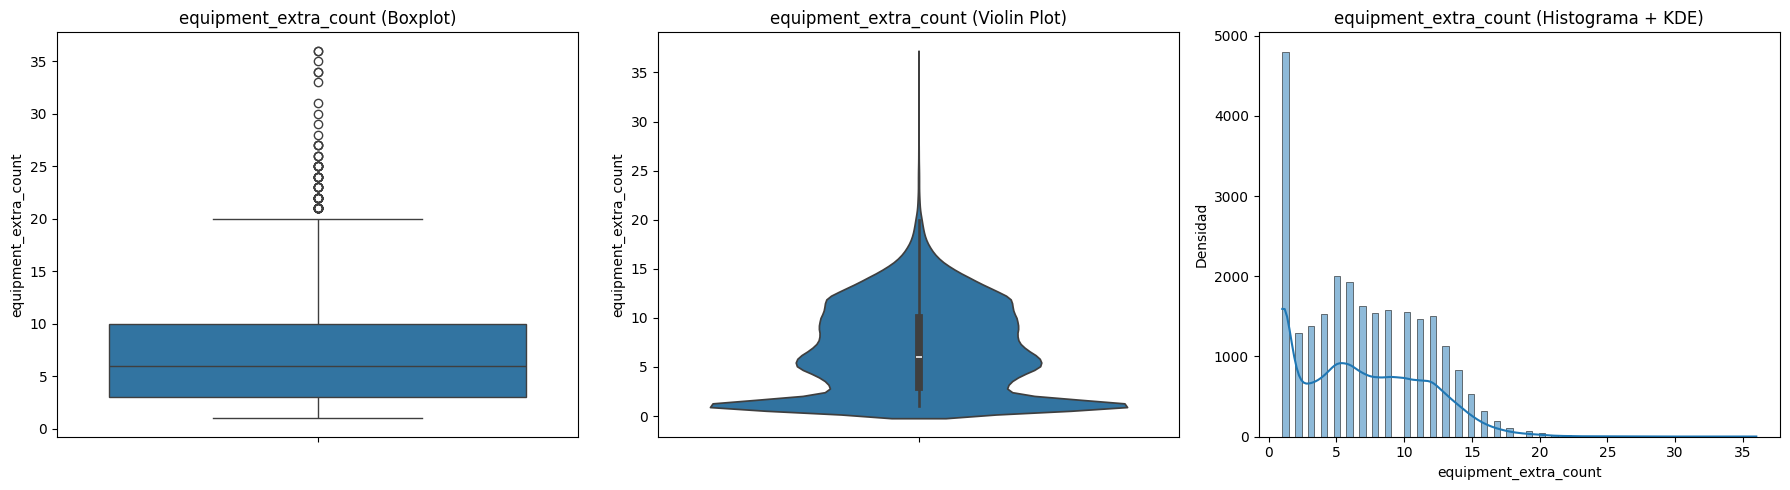

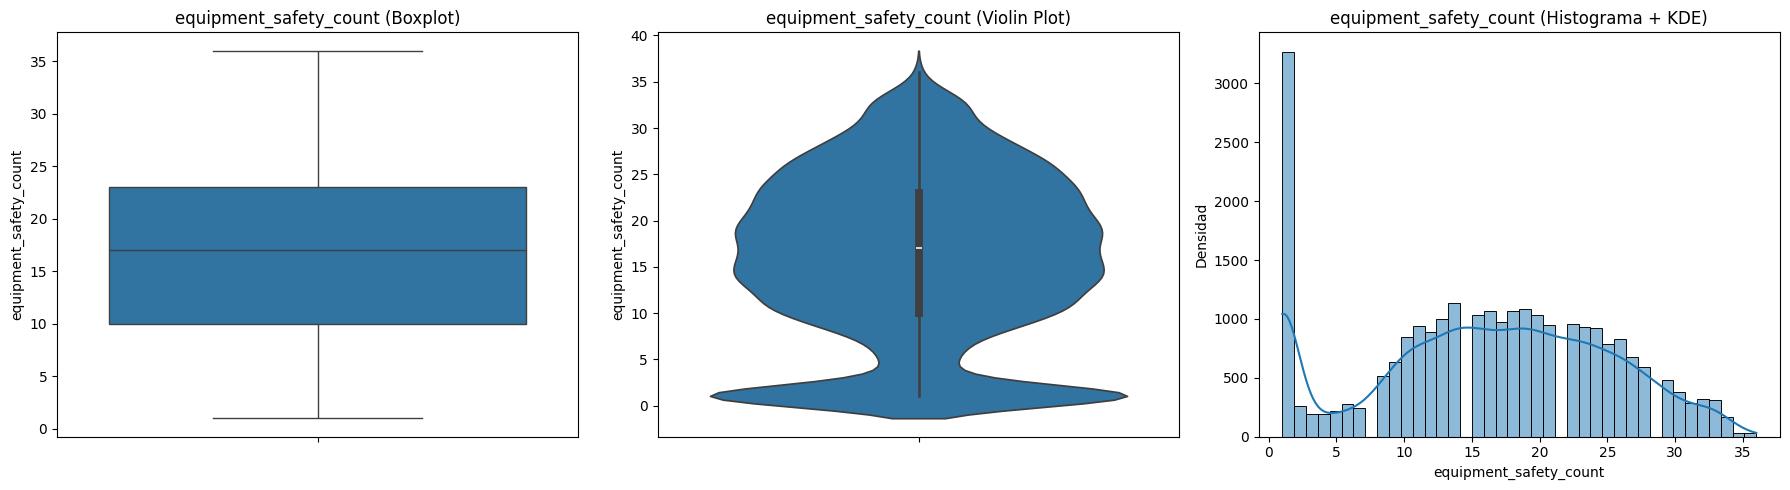

In [20]:
# Visualzando variables continuas
vista_numericas(columnas_numericas, df, xlim=None)

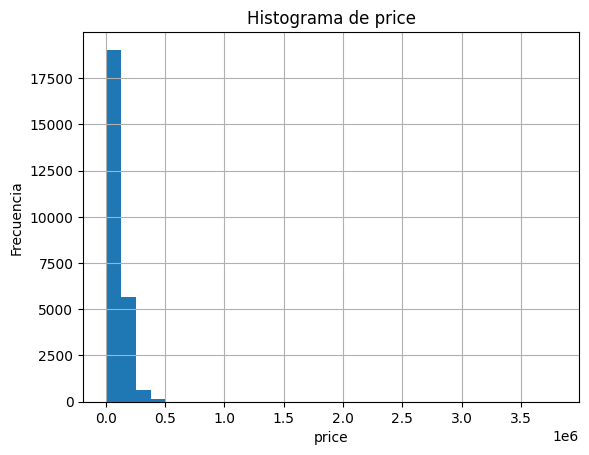

In [21]:
histograma_variable(df, "price")

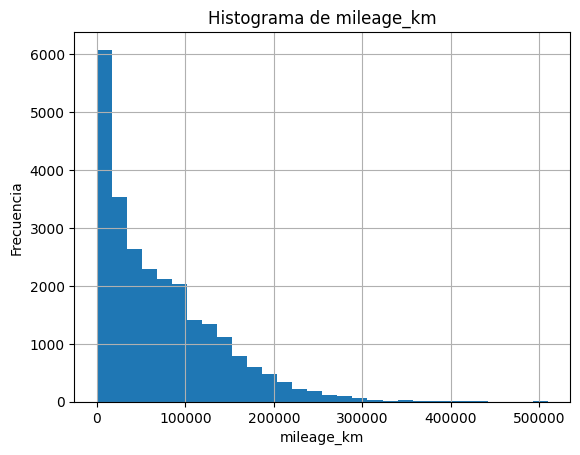

In [22]:
histograma_variable(df, "mileage_km")

### Analisis Bivariado

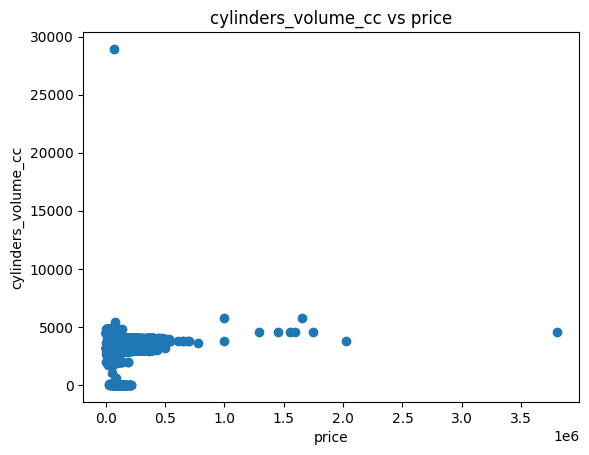

In [23]:
grafico_bivariado(df, "price", "cylinders_volume_cc")

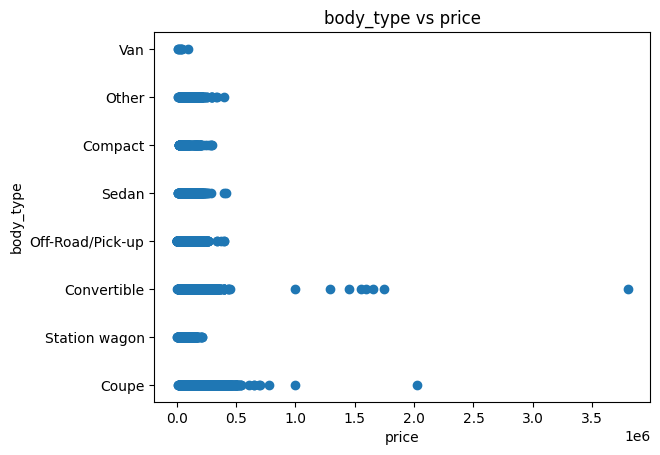

In [24]:
grafico_bivariado(df, "price", "body_type")

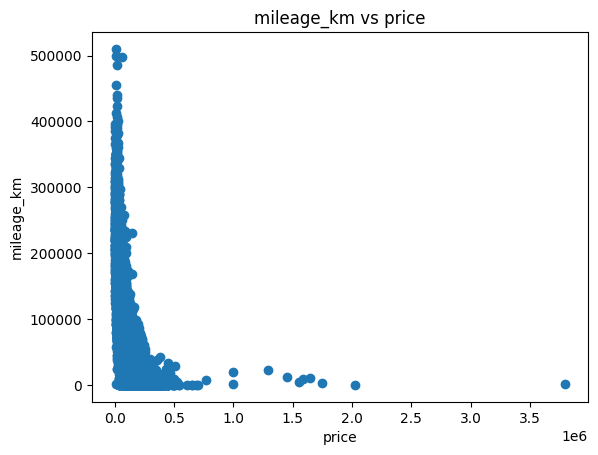

In [25]:
grafico_bivariado(df, "price", "mileage_km")

In [26]:
cols_to_drop = [
    'vehicle_type',
    'had_accident',
    'is_rental',
    'offer_type',
    'model'
]

df = df.drop(columns=cols_to_drop)

In [27]:
# Variables string y booleanas
cat_cols = df.select_dtypes(include=['object', 'string']).columns
bool_cols = df.select_dtypes(include='bool').columns

In [28]:
# Haciendo numericas las variables categoricas
df = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True,
    dtype=int
)

# Haciendo numericas las variables boooleanas
df[bool_cols] = df[bool_cols].astype(int)

In [29]:
# =========================
# FEATURE ENGINEERING NUEVO (ALTO VALOR)
# =========================

# Kilómetros recorridos por año (uso real del vehículo)
df['km_per_year'] = df['mileage_km'] / (df['vehicle_age'] + 1)

# Relación potencia-peso (desempeño del vehículo)
df['power_to_weight'] = df['power_hp'] / df['weight_kg']

# Total de equipamiento (confort + seguridad + extras)
df['equipment_total'] = (
    df['equipment_comfort_count'] +
    df['equipment_entertainment_count'] +
    df['equipment_extra_count'] +
    df['equipment_safety_count']
)

# Eliminar los conteos individuales si quieres menos columnas
df = df.drop(columns=[
    'equipment_comfort_count',
    'equipment_entertainment_count',
    'equipment_extra_count',
    'equipment_safety_count', 
    'paint_type_Others'
])

# =========================
#  TRANSFORMACIONES NUMÉRICAS SUAVES
# =========================

# Log del kilometraje para reducir asimetría
df['log_mileage'] = np.log1p(df['mileage_km'])


In [30]:
df.columns

Index(['price', 'mileage_km', 'nr_seats', 'nr_doors', 'power_hp', 'cylinders',
       'cylinders_volume_cc', 'weight_kg', 'has_particle_filter',
       'electric_range_km', 'is_used', 'has_full_service_history',
       'non_smoking', 'seller_is_dealer', 'vehicle_age',
       'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road/Pick-up', 'body_type_Other', 'body_type_Sedan',
       'body_type_Station wagon', 'body_type_Van', 'transmission_Manual',
       'transmission_Semi-automatic', 'drive_train_Front Wheel Drive',
       'drive_train_Rear Wheel Drive', 'fuel_category_Electric',
       'fuel_category_Electric/Diesel', 'fuel_category_Electric/Gasoline',
       'fuel_category_Ethanol', 'fuel_category_Gasoline', 'fuel_category_LPG',
       'fuel_category_Others', 'country_code_BE', 'country_code_DE',
       'country_code_ES', 'country_code_FR', 'country_code_IT',
       'country_code_LU', 'country_code_NL', 'seller_type_PrivateSeller',
       'km_per_year', 'power_to_we

In [31]:
# Variables numericas continuas
num_cols = df.select_dtypes(include='number').columns

In [38]:
# Preparar datos
X = df.drop(columns=['price'])  
y = df['price']                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelo
rf = RandomForestRegressor(
    n_estimators=120,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

# Entrenar
rf.fit(X_train_scaled, y_train)

# Predecir
y_train_pred = rf.predict(X_train_scaled)
y_test_pred  = rf.predict(X_test_scaled)

# Evaluar directamente en precio normal
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE :", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))


Train MAE: 4891.159961672575
Test MAE : 8880.503845685987
Train RMSE: 10003.119294717824
Test RMSE : 35387.62235023434
Train R2: 0.981720245337019
Test R2 : 0.8253066482590461


In [39]:
import joblib

model_package = {
    "model": rf,
    "scaler": scaler,
    "columns": X.columns.tolist()
}

joblib.dump(
    model_package,
    "modelo_porsche_0.joblib",
    compress=5   
)

print("Modelo guardado correctamente ✅")


Modelo guardado correctamente ✅
